<a href="https://colab.research.google.com/github/pinei/ciencia-dados-python/blob/main/imersao-dados/3_Distribui%C3%A7%C3%B5es_e_Correla%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Amostra de dados do ENEM (dados originais disponiveis em http://portal.inep.gov.br/microdados)
fonte = "https://raw.githubusercontent.com/alura-cursos/imersao-dados-2-2020/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv"
dados_df = pd.read_csv(fonte)  # type: <class 'pandas.core.frame.DataFrame'>

# Ciências da Natureza, Ciências Humanas, Matemática, Linguagens e Codigos, Redação
provas = ["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_MT", "NU_NOTA_LC", "NU_NOTA_REDACAO"]

# Soma das Notas é dada pela Soma Horizontal das variáveis que representam as Notas (axis=1)
# Precisa de uma Nota válida para ser considerada, se tornando NaN se todas a Notas foram NaN (min_count=1)
dados_df["NU_NOTA_TOTAL"] = dados_df[provas].sum(axis=1, min_count=1) # type: pandas.core.series.Series

# Acesso a Internet
dados_df["IN_INTERNET"] = dados_df.apply(lambda row: "Sim" if (row["Q025"] == "B") else "Não", axis=1)

Definindo uma função para facilitar o uso do gráfico Boxplot

In [ ]:
import seaborn as sns # Seaborn is a Python data visualization library based on matplotlib.

# Função customizada para uso do boxplot a partir de 2 variáveis, ordenando o eixo x
def _boxplot(data, x, y, title, hue=None):
  # Valores ordenados da coluna x
  order = data[x].unique() # type: numpy.ndarray
  order.sort()

  # Boxplot com outliers na faixa de 1.5% da amostra
  # Documentação indica que 1.5 já seria o valor padrão para a configuração dos whiskers (optei por manter explicito)
  sns.boxplot(data = data, x=x, y=y, order=order, whis = 1.5, hue=hue)
  plt.title(title)

### Classificação de Renda do ENEM

|Código|Renda (R$)|
|------|-----|
|A|Nenhuma renda|
|B|até 998,00|
|C|até 1.497,00|
|D|até 1.996,00|
|E|até 2.495,00|
|F|até 2.994,00|
|G|até 3.992,00|
|H|até 4.990,00|
|I|até 5.988,00|
|J|até 6.986,00|
|K|até 7.984,00|
|L|até 8.982,00|
|M|até 9.980,00|
|N|até 11.976,00|
|O|até 14.970,00|
|P|até 19.960,00|
|Q|mais de 19.960,00|

Verificando assimetrias nas Distribuições das Notas de Matemática e Linguagens e Código

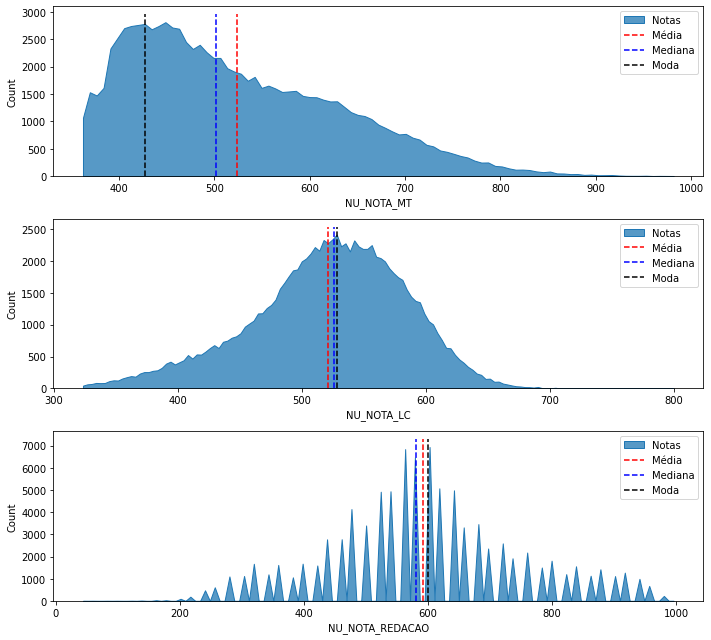

In [ ]:
plt.figure(figsize=(10,9))

notas_mt_sem_zero = dados_df.query("NU_NOTA_MT > 0")["NU_NOTA_MT"]
notas_lc_sem_zero = dados_df.query("NU_NOTA_LC > 0")["NU_NOTA_LC"]
notas_redacao_sem_zero = dados_df.query("NU_NOTA_REDACAO > 0")["NU_NOTA_REDACAO"]

def plot_stats(series):
  sns.histplot(series, element="poly")

  min = 0
  max = plt.ylim()[1]
  mean = series.mean()
  median = series.median()
  mode = series.mode()[0]

  plt.vlines(x=mean, ymin=min, ymax=max, label="Média", color="red", linestyles="dashed")
  plt.vlines(x=median, ymin=min, ymax=max, label="Mediana", color="blue", linestyles="dashed")
  plt.vlines(x=mode, ymin=min, ymax=max, label="Moda", color="black", linestyles="dashed")
  plt.legend(["Notas","Média","Mediana","Moda"])

plt.subplot(311)
plot_stats(notas_mt_sem_zero)

plt.subplot(312)
plot_stats(notas_lc_sem_zero)

plt.subplot(313)
plot_stats(notas_redacao_sem_zero)

# Ajuste automático para evitar sobreposição de elementos
plt.tight_layout()

Comparando a Distrbuição de Notas dos que tem e não tem Acesso a Internet

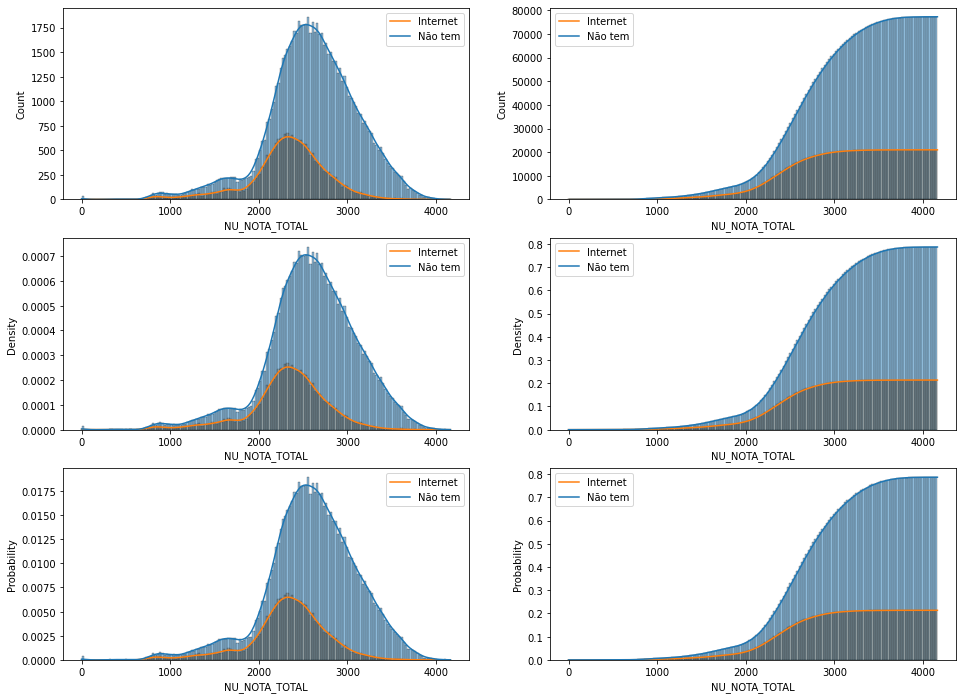

In [ ]:
plt.figure(figsize=(16,12))

def legenda_internet():
  plt.legend(["Internet", "Não tem"])

plt.subplot(321)
sns.histplot(dados_df, x="NU_NOTA_TOTAL", hue="Q025", kde=1)
legenda_internet()

plt.subplot(322)
sns.histplot(dados_df, x="NU_NOTA_TOTAL", hue="Q025", kde=1, cumulative=True)
legenda_internet()

plt.subplot(323)
sns.histplot(dados_df, x="NU_NOTA_TOTAL", hue="Q025", kde=1, stat="density")
legenda_internet()

plt.subplot(324)
sns.histplot(dados_df, x="NU_NOTA_TOTAL", hue="Q025", kde=1, stat="density", cumulative=True)
legenda_internet()

plt.subplot(325)
sns.histplot(dados_df, x="NU_NOTA_TOTAL", hue="Q025", kde=1, stat="probability")
legenda_internet()

plt.subplot(326)
sns.histplot(dados_df, x="NU_NOTA_TOTAL", hue="Q025", kde=1, stat="probability", cumulative=True)
legenda_internet()

Correlação entre as Notas de Matemática e Linguagens e Código

(300.0, 1000.0)

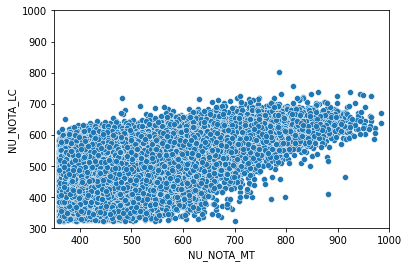

In [ ]:
sns.scatterplot(data=dados_df, x="NU_NOTA_MT", y="NU_NOTA_LC")
plt.xlim(350, 1000)
plt.ylim(300, 1000)

Correlações entre todos os pares de Notas

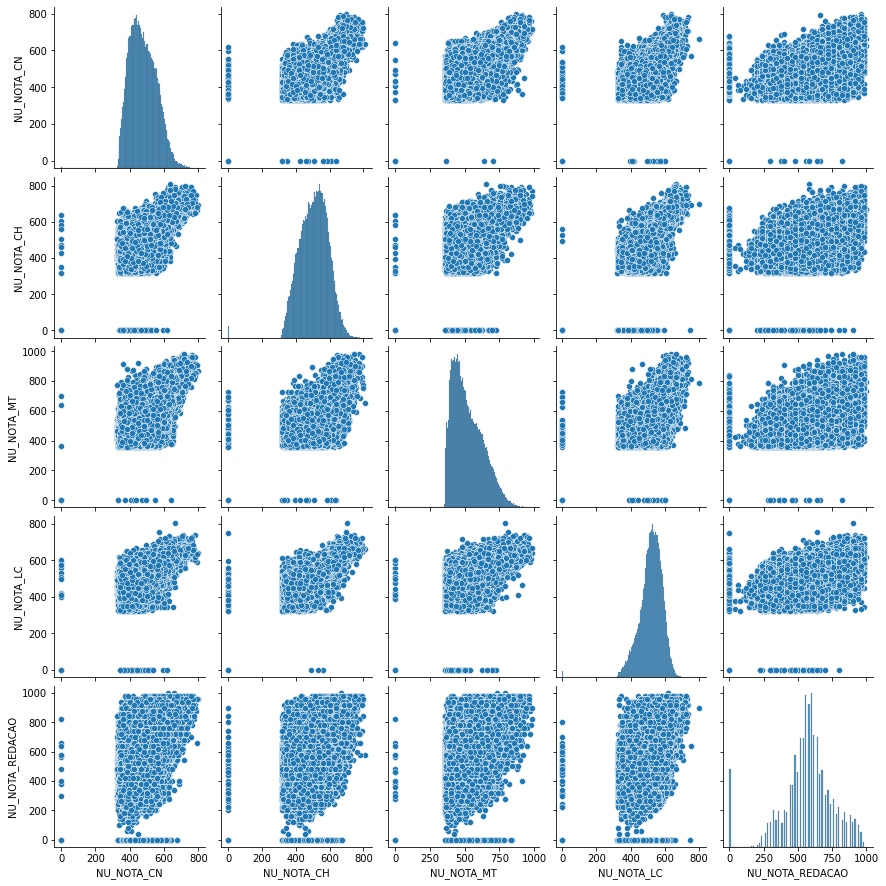

In [ ]:
sns.pairplot(dados_df[provas])

In [ ]:
correlacoes_notas = dados_df[provas].corr()
correlacoes_notas

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.669259,0.650055,0.641998,0.504903
NU_NOTA_CH,0.669259,1.000000,0.610570,0.748844,0.530950
NU_NOTA_MT,0.650055,0.610570,1.000000,0.587986,0.493200
NU_NOTA_LC,0.641998,0.748844,0.587986,1.000000,0.537690
NU_NOTA_REDACAO,0.504903,0.530950,0.493200,0.537690,1.000000


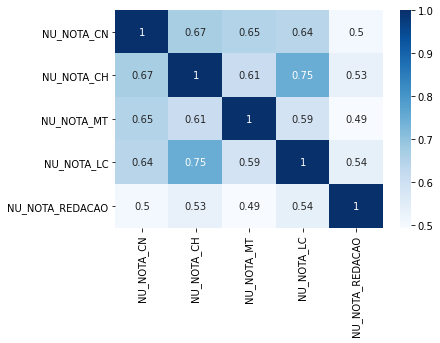

In [ ]:
sns.heatmap(correlacoes_notas, cmap="Blues", annot=True)

In [ ]:
## Curiosidades

[Spurious Correlations](https://tylervigen.com/spurious-correlations)
Correlações que não significam nada.

## Desafios

- [ ] Criar uma matriz diagonal para o heatmap acima (evitando o espelhamento)